In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# General Query

In [11]:
# top 10 zip codes
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [13]:
# top 10 townships
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [15]:
# number of unique titles
df['title'].nunique()

110

# craeting new columns

In [16]:
# Reason coulmn with help of EMS

    # for single observation
x = df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [18]:
    # for whole data
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [60]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [20]:
# most common reason for call
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [27]:
#df['Reason'].hist()

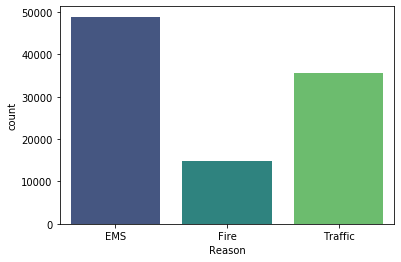

In [26]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

## for timestamp

In [49]:
type(df['timeStamp'].iloc[0])  # since it is a string

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df ['timeStamp'] = pd.to_datetime(df['timeStamp'])  # converting to datetime stamp

In [51]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
print(df['timeStamp'].iloc[0])
time = df['timeStamp'].iloc[0]
print(time)
time.hour

2015-12-10 17:40:00
2015-12-10 17:40:00


17

In [53]:
time.dayofweek

3

In [54]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [55]:
df['Hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

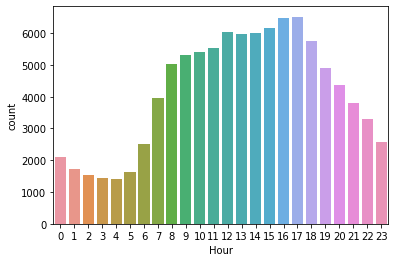

In [56]:
# number of call is particular hour 
sns.countplot(x= 'Hour', data = df)

In [62]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

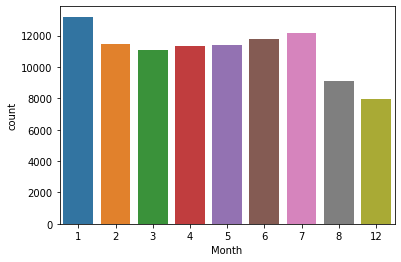

In [63]:
# number of call in particular month
sns.countplot(x= 'Month', data = df)

In [64]:
# number of calls in particular day fo week
#sns.countplot(x= 'Day of week', data = df)
df['Day of week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [65]:
dmap = {
    0: 'Mon',
    1: 'Tues',
    2: 'Wed',
    3: 'Thur',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun',
}

In [66]:
df['Day of week'] = df['Day of week'].map(dmap)

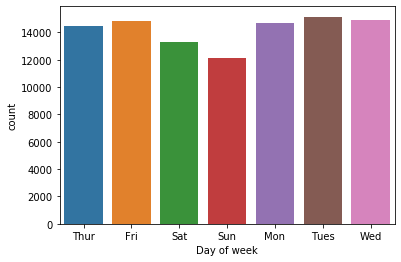

In [67]:
sns.countplot(x= 'Day of week', data = df)

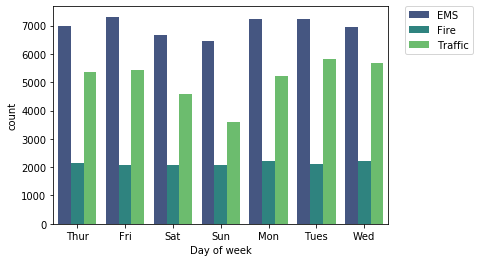

In [70]:
# to see number of reasons on a particular day

sns.countplot(x= 'Day of week', data = df, hue = 'Reason', palette = 'viridis')
# to put legend out of the box
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

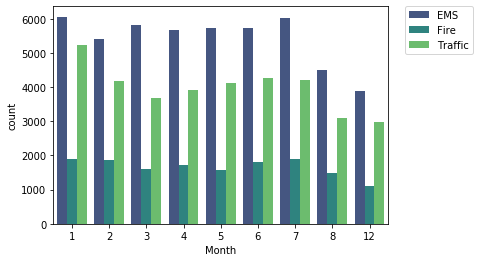

In [71]:
# see number of reasons on particulatly month

sns.countplot(x= 'Month', data = df, hue = 'Reason', palette = 'viridis')
# to put legend out of the box
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

# Visulaization

In [72]:
byMonth = df.groupby('Month').count()

In [73]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### some months are missing

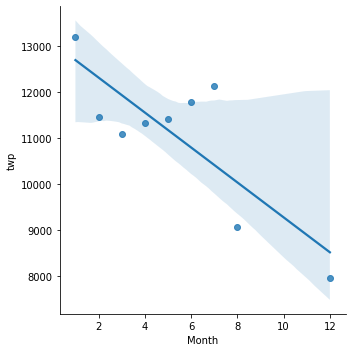

In [76]:
# print(byMonth.reset_index())
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [78]:
t = df['timeStamp'].iloc[0]
print(t.date())

2015-12-10


In [79]:
df['Date'] = df['timeStamp'].apply(lambda d: d.date())

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thur,2015-12-10


In [82]:
df.groupby('Date').count().head()    # some coulms have different value

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


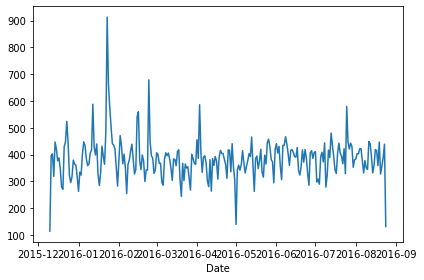

In [83]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

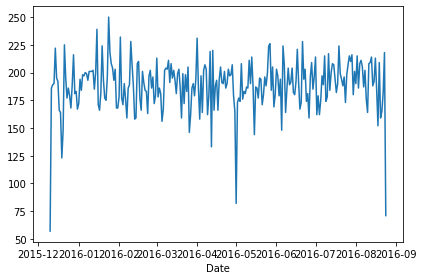

In [86]:
# for EMS calls only
df[df['Reason' ]== 'EMS'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()

In [87]:
df.groupby( by = ['Day of week', 'Hour']).count()    # creates multiplvel index

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [89]:
df.groupby( by = ['Day of week', 'Hour']).count()['Reason']

Day of week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [92]:
dayHour =df.groupby( by = ['Day of week', 'Hour']).count()['Reason'].unstack()

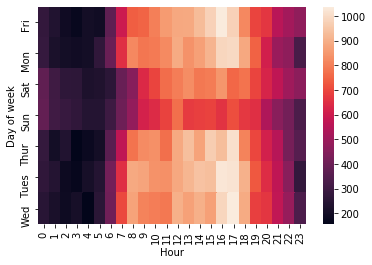

In [94]:
 # now we cpuld plot a heatmap to find the number of reasons on a partical day and hour
sns.heatmap(dayHour)

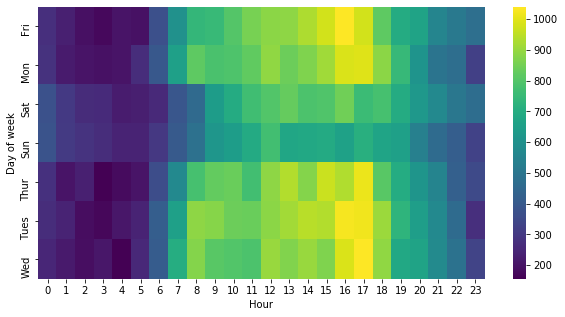

In [95]:
plt.figure(figsize = (10,5))
sns.heatmap(dayHour, cmap = 'viridis')

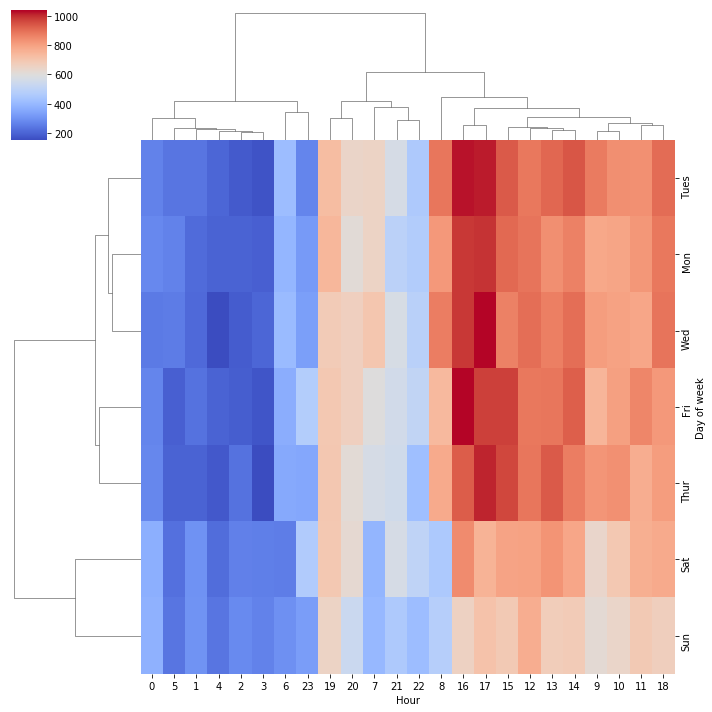

In [98]:
sns.clustermap(dayHour, cmap = 'coolwarm')

### same fo month and day

In [101]:
dayMonth = df.groupby( by = ['Month', 'Day of week']).count()['Reason'].unstack()

In [102]:
dayMonth.head()

Day of week,Fri,Mon,Sat,Sun,Thur,Tues,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


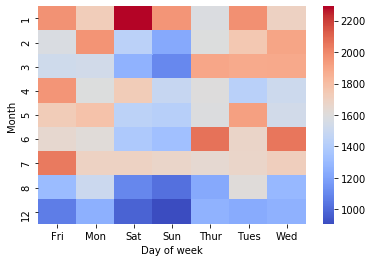

In [103]:
sns.heatmap(dayMonth, cmap = 'coolwarm')

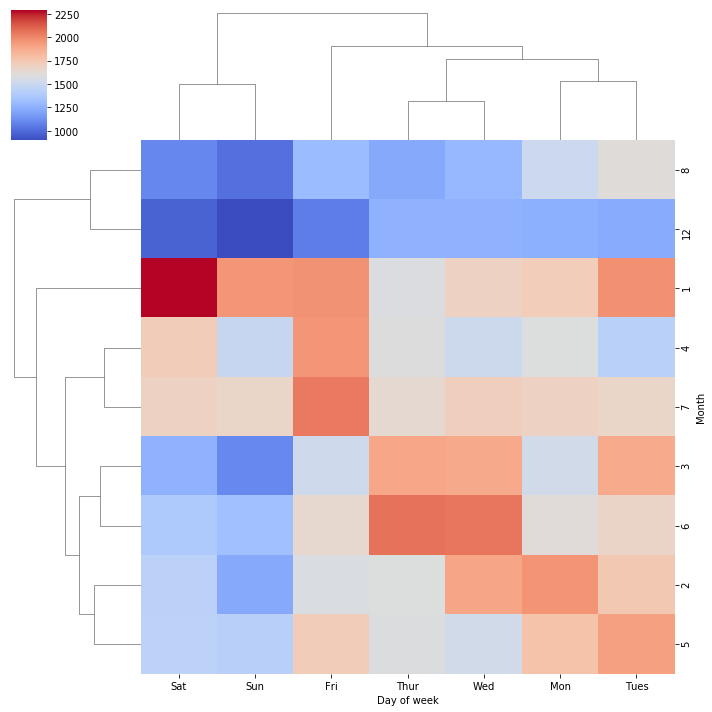

In [104]:
sns.clustermap(dayMonth, cmap ='coolwarm')